###Segment customers based on behavior, brand preference, and engagement type

In [100]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [80]:
data = pd.read_csv("../data/TechCorner_Sales_update.csv")

In [81]:
data.rename(columns={'Does he/she Come from Facebook Page?':'from_FB', 'Does he/she Followed Our Page?':'follows_page', 'Did he/she buy any mobile before?':'bought_before', 'Did he/she hear of our shop before?':'heard_of_shop'}, inplace=True)

Encode gender and yes/no columns

In [82]:
data['is_male'] = data['Gender'].apply(lambda x: 1 if x == 'M' else 0)

In [83]:
# Detect Yes/No columns automatically
yes_no_cols = [col for col in data.columns if set(data[col].dropna().unique()) <= {'Yes', 'No'}]

# Convert them
data[yes_no_cols] = data[yes_no_cols].replace({'Yes': 1, 'No': 0})

C:\Users\ggibs\AppData\Local\Temp\ipykernel_12092\116482526.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data[yes_no_cols] = data[yes_no_cols].replace({'Yes': 1, 'No': 0})


Can brand be separated?

In [84]:
data.groupby('Mobile Name')['Cus.ID'].count()

Mobile Name
Galaxy A55 5G 8/128         522
Galaxy M35 5G 8/128         528
Galaxy S24 Ultra 12/256     541
Moto G85 5G 8/128           560
Narzo N53 4/64              530
Note 11S 6/128              538
Note 14 Pro 5G 8/256        495
Pixel 7a 8/128              518
Pixel 8 Pro 12/256          533
R-70 Turbo 5G 6/128         511
Redmi Note 12 Pro 8/128     528
Vivo T3x 5G 8/128           514
Vivo Y200 5G 6/128          520
iPhone 16 Pro 256GB         521
iPhone 16 Pro Max 1TB       488
iQOO Neo 9 Pro 5G 12/256    502
iQOO Z7 5G 6/128            522
Name: Cus.ID, dtype: int64

In [85]:
# Separate brand from model, assuming the first word is the brand
data['brand'] = data['Mobile Name'].apply(lambda x: x.split()[0])

In [86]:
# Encode the brand names into numerical values
data['brand_encoded'] = LabelEncoder().fit_transform(data['brand'])

In [87]:
data.head()

,Cus.ID,Date,Cus. Location,Age,Gender,Mobile Name,Sell Price,from_FB,follows_page,bought_before,heard_of_shop,is_male,brand,brand_encoded
0,1,27-05-2024,Rangamati Sadar,49,F,Galaxy A55 5G 8/128,17073.0,0,1,0,1,0,Galaxy,0
1,2,27-05-2024,Inside Rangamati,44,M,Redmi Note 12 Pro 8/128,15546.0,1,0,0,1,1,Redmi,6
2,3,27-05-2024,Rangamati Sadar,45,M,R-70 Turbo 5G 6/128,26516.0,1,0,0,1,1,R-70,5
3,4,27-05-2024,Rangamati Sadar,46,M,R-70 Turbo 5G 6/128,21927.0,0,0,0,1,1,R-70,5
4,5,27-05-2024,Outside Rangamati,27,F,Vivo T3x 5G 8/128,16718.0,1,0,0,1,0,Vivo,7


In [90]:
# Select relevant columns
features = [
    'Age',
    'Sell Price',
    'from_FB',
    'follows_page',
    'bought_before',
    'heard_of_shop',
    'is_male',
    'brand_encoded'
    ]

data_sub = data[features]

In [91]:
# Scale Age and Sell Price
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_sub)

Elbow method to find optimal number of clusters

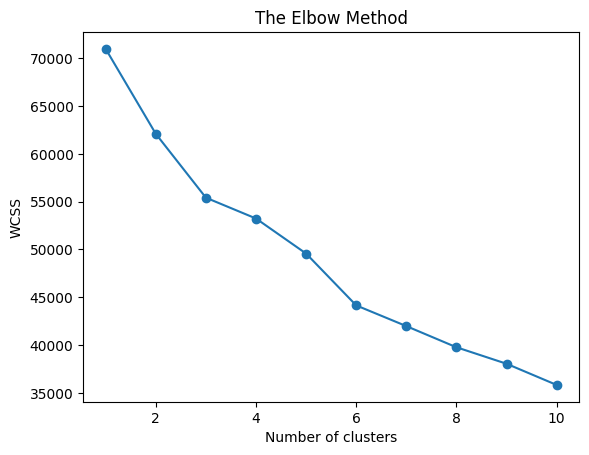

In [93]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, random_state = 7)
    kmeans.fit(data_scaled)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss, marker='o')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [96]:
k = 6  # Choose the number of clusters based on the elbow method
kmeans = KMeans(n_clusters=k, random_state=7)
clusters = kmeans.fit_predict(data_scaled)

In [97]:
# Add cluster labels back to original data
data['Segment'] = clusters

Visualize the clusters

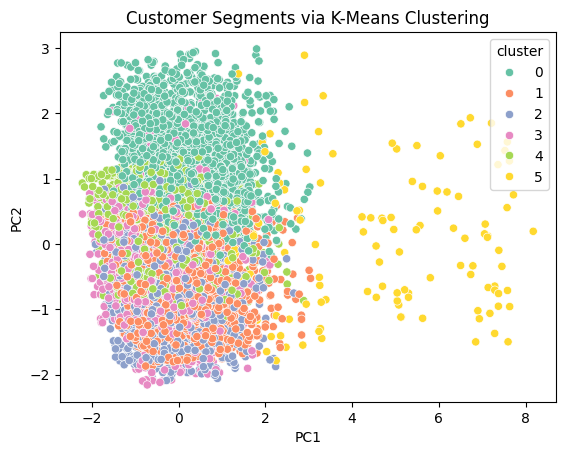

In [102]:
# Reduce dimensionality for 2D plotting
pca = PCA(n_components=2)
components = pca.fit_transform(data_scaled)

data['PC1'] = components[:, 0]
data['PC2'] = components[:, 1]

# Plot the clusters
sns.scatterplot(data, x='PC1', y='PC2', hue='cluster', palette='Set2')
plt.title('Customer Segments via K-Means Clustering')
plt.show()